## Street Cleaning Data in 5 Years (2018-2022)
For street cleaning, the dataframe contains two codes in 'Violation' column: TRC7.2.22 and T37C, all data after 2018 use TRC7.2.22  
Filter dataframe before cleaning data for the whole dataframe is too large (19M rows of data)

*Code description and more info could be found [here](https://www.sfmta.com/sites/default/files/reports-and-documents/2022/10/fy_2023_fees_and_fines_effective_7.1.22_1.pdf)*

Data as of Dec. 13, 2022

### Import Data

In [11]:
# Import pandas and altair

import pandas as pd
import altair as alt
alt.renderers.enable('jupyterlab')

RendererRegistry.enable('jupyterlab')

In [12]:
# Import citation_st_cleaning_5yr.csv
st_cleaning_5yr = pd.read_csv('citation_st_cleaning_5yr.csv',
                              dtype={'Citation Number': object} ,
                              parse_dates=['Citation Issued DateTime'])

In [13]:
st_cleaning_5yr

,Citation Number,Citation Issued DateTime,Violation,Violation Description,Citation Location,Vehicle Plate State,Vehicle Plate,Fine Amount,Date Added,geom,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
0,894375451,2018-02-20 10:15:00,TRC7.2.22,STR CLEAN,3898 WASHINGTON ST,CA,ELBA227,73.0,08/10/2021 12:00:00 AM,POINT (-122.45708101499997 37.788961003000054),10.0,10.0,8.0,6.0,31.0
1,895929086,2018-03-29 09:35:00,TRC7.2.22,STR CLEAN,812 SILLIMAN ST,CA,7TGY978,73.0,08/10/2021 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN
2,938910103,2021-05-03 12:13:00,TRC7.2.22,STR CLEAN,1820 25TH ST,CA,6HKN775,83.0,08/08/2021 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN
3,900852466,2018-08-13 08:24:00,TRC7.2.22,STR CLEAN,173 ARKANSAS ST,CA,56907K2,76.0,02/13/2022 12:00:00 AM,POINT (-122.39854476899995 37.76402533000004),54.0,54.0,1.0,9.0,26.0
4,900915735,2018-08-17 09:40:00,TRC7.2.22,STR CLEAN,224 GARFIELD ST,CA,7T62119,76.0,02/13/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2402435,956011943,2022-10-13 08:57:00,TRC7.2.22,STR CLEAN,450 HAYES ST,CA,7TQF439,87.0,11/10/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN
2402436,956034936,2022-10-12 00:38:00,TRC7.2.22,STR CLEAN,580 YORK ST,CA,8XWY238,87.0,11/10/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN
2402437,956035183,2022-10-12 02:12:00,TRC7.2.22,STR CLEAN,801 MINNESOTA ST,CA,5JRJ270,87.0,11/24/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN
2402438,955639215,2022-10-21 06:17:00,TRC7.2.22,STR CLEAN,1234 FLORIDA ST,CA,N696C0,87.0,11/10/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
st_cleaning_5yr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2402440 entries, 0 to 2402439
Data columns (total 15 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   Citation Number               object        
 1   Citation Issued DateTime      datetime64[ns]
 2   Violation                     object        
 3   Violation Description         object        
 4   Citation Location             object        
 5   Vehicle Plate State           object        
 6   Vehicle Plate                 object        
 7   Fine Amount                   float64       
 8   Date Added                    object        
 9   geom                          object        
 10  Neighborhoods                 float64       
 11  SF Find Neighborhoods         float64       
 12  Current Police Districts      float64       
 13  Current Supervisor Districts  float64       
 14  Analysis Neighborhoods        float64       
dtypes: datetime64[ns](1), float64(6)

### Clean Data

1. According to SFMTA's email reply, citations with 'Fine Amount' that are '$0.0' were voided. Should be cleaned out from the data.
2. Closely look at citations given between March 17, 2020 and June 14, 2020.
3. Delete confirmed error rows for 'citation location' that have no addresses.

### Replies by SFMTA

1. Citations with $0.0 amount means that the citations were voided after they were written. This often happens if the vehicles moves before the officer finishes writing the citation.
2. There are citations given between March 17, 2020 and June 14, 2020. Most street cleaning locations for these citations are in the morning and the anouncement for not issueing citation is in the afternoon of March 17, 2020. The SFMTA refunded citations issued that day and voided that were not paid.
3. Citations without addresses (includes no address+no geometry and no address+geometry) are errors.

#### Delete rows with $0.0 fine

In [15]:
# There are 335 rows with $0.0 amount of fine
st_cleaning_5yr[st_cleaning_5yr['Fine Amount'] == 0.0]

,Citation Number,Citation Issued DateTime,Violation,Violation Description,Citation Location,Vehicle Plate State,Vehicle Plate,Fine Amount,Date Added,geom,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
25745,942128865,2021-08-07 04:49:00,TRC7.2.22,STR CLEAN,16TH ST,DD,20212B9,0.0,08/12/2021 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN
30503,920114101,2018-06-22 00:21:00,TRC7.2.22,STR CLEAN,NaN,CA,7MNE141,0.0,06/24/2018 12:00:00 AM,POINT (-122.41963999999996 37.777120000000025),21.0,21.0,4.0,10.0,36.0
31289,942186641,2021-08-07 02:52:00,TRC7.2.22,STR CLEAN,3141 16TH STREET,CA,8AIR664,0.0,08/12/2021 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN
72844,945312620,2021-11-20 02:51:00,TRC7.2.22,STR CLEAN,2 3RD STREET,CA,6FVR765,0.0,11/25/2021 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN
73001,945474810,2021-11-20 02:47:00,TRC7.2.22,STR CLEAN,GRANT AVE,DD,20213B4,0.0,11/25/2021 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2352361,956069730,2022-10-17 00:12:00,TRC7.2.22,STR CLEAN,823 EMBARCADERO NORTH,CA,4MB8593,0.0,10/22/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN
2352381,956069774,2022-10-17 02:14:00,TRC7.2.22,STR CLEAN,MISSION ST,CA,62376U2,0.0,10/22/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN
2352385,956077172,2022-10-17 01:07:00,TRC7.2.22,STR CLEAN,101 9TH STREET,CA,6GIH876,0.0,10/22/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN
2352453,956069855,2022-10-17 04:12:00,TRC7.2.22,STR CLEAN,2074 MISSION ST,CA,8LFT084,0.0,10/22/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Delete those 335 rows
st_cleaning_5yr = st_cleaning_5yr[st_cleaning_5yr['Fine Amount'] != 0.0].copy()

In [17]:
# Check if deleted
st_cleaning_5yr[st_cleaning_5yr['Fine Amount'] == 0.0]

,Citation Number,Citation Issued DateTime,Violation,Violation Description,Citation Location,Vehicle Plate State,Vehicle Plate,Fine Amount,Date Added,geom,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods


In [18]:
st_cleaning_5yr['Fine Amount'].value_counts()

79.0     634595
76.0     507686
85.0     277788
83.0     265577
73.0     260215
84.0     230913
87.0     225323
25.0          2
110.0         2
189.0         2
272.0         1
71.0          1
Name: Fine Amount, dtype: int64

#### Delete citations given between 03/17/20 - 06/14/20

In [19]:
# Call out rows from March 17, 2020 to June 14, 2020
# There are 2982 rows that tickets were given during the pandemic citation waive period (3/17/20-6/15/20)
# Mostly(2978) rows are issued on March 17, 2020
st_cleaning_5yr[
    (st_cleaning_5yr['Citation Issued DateTime'] >= '2020-03-17') & 
    (st_cleaning_5yr['Citation Issued DateTime'] < '2020-06-15')
].sort_values(
    ['Citation Issued DateTime']
)

,Citation Number,Citation Issued DateTime,Violation,Violation Description,Citation Location,Vehicle Plate State,Vehicle Plate,Fine Amount,Date Added,geom,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
1780107,929285361,2020-03-17 00:01:00,TRC7.2.22,STR CLEAN,450 CLEMENTINA ST,CA,6ZME824,79.0,07/28/2020 12:00:00 AM,POINT (-122.40518102499999 37.77992698700007),32.0,32.0,1.0,10.0,34.0
2081581,929285372,2020-03-17 00:02:00,TRC7.2.22,STR CLEAN,450 CLEMENTINA ST,CA,57336C2,79.0,07/28/2020 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN
1774694,929395434,2020-03-17 00:05:00,TRC7.2.22,STR CLEAN,595 07TH ST,CA,30130C1,79.0,07/28/2020 12:00:00 AM,POINT (-122.33281512199994 37.578692457000045),NaN,NaN,NaN,NaN,NaN
2079988,929285383,2020-03-17 00:05:00,TRC7.2.22,STR CLEAN,455 NATOMA ST,CA,8EUD958,79.0,07/28/2020 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN
2078609,929285394,2020-03-17 00:06:00,TRC7.2.22,STR CLEAN,445 NATOMA ST,CA,5FBY631,79.0,07/28/2020 12:00:00 AM,POINT (-122.40648198099996 37.780916010000055),32.0,32.0,1.0,10.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216893,1005996202,2020-03-17 14:05:00,TRC7.2.22,STR CLEAN,2018 MARIPOSA ST,CA,6XZW042,79.0,09/21/2020 12:00:00 AM,POINT (-122.40385400199995 37.76362301200004),54.0,54.0,1.0,9.0,26.0
17311,922837101,2020-03-25 14:29:00,TRC7.2.22,STR CLEAN,5455 03RD ST,CA,TESTINT,79.0,12/05/2022 12:00:00 AM,POINT (-122.41963999999996 37.777120000000025),21.0,21.0,4.0,10.0,36.0
1170005,1006048385,2020-04-28 08:30:00,TRC7.2.22,STR CLEAN,10 BRUSNAN,CA,7T72157,79.0,09/02/2020 12:00:00 AM,POINT (-122.422400891 37.768835685000056),37.0,37.0,3.0,5.0,20.0
2168468,920607306,2020-05-19 09:16:00,TRC7.2.22,STR CLEAN,252 02ND ST,CA,558A44,79.0,07/27/2020 12:00:00 AM,POINT (-122.33751703099995 37.57535821500005),NaN,NaN,NaN,NaN,NaN


In [20]:
st_cleaning_5yr[
    (st_cleaning_5yr['Citation Issued DateTime'] >= '2020-03-17') & 
    (st_cleaning_5yr['Citation Issued DateTime'] < '2020-03-18')
].sort_values(
    ['Citation Issued DateTime']
)

,Citation Number,Citation Issued DateTime,Violation,Violation Description,Citation Location,Vehicle Plate State,Vehicle Plate,Fine Amount,Date Added,geom,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
1780107,929285361,2020-03-17 00:01:00,TRC7.2.22,STR CLEAN,450 CLEMENTINA ST,CA,6ZME824,79.0,07/28/2020 12:00:00 AM,POINT (-122.40518102499999 37.77992698700007),32.0,32.0,1.0,10.0,34.0
2081581,929285372,2020-03-17 00:02:00,TRC7.2.22,STR CLEAN,450 CLEMENTINA ST,CA,57336C2,79.0,07/28/2020 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN
1774694,929395434,2020-03-17 00:05:00,TRC7.2.22,STR CLEAN,595 07TH ST,CA,30130C1,79.0,07/28/2020 12:00:00 AM,POINT (-122.33281512199994 37.578692457000045),NaN,NaN,NaN,NaN,NaN
2079988,929285383,2020-03-17 00:05:00,TRC7.2.22,STR CLEAN,455 NATOMA ST,CA,8EUD958,79.0,07/28/2020 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN
2078609,929285394,2020-03-17 00:06:00,TRC7.2.22,STR CLEAN,445 NATOMA ST,CA,5FBY631,79.0,07/28/2020 12:00:00 AM,POINT (-122.40648198099996 37.780916010000055),32.0,32.0,1.0,10.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1766086,929019184,2020-03-17 13:25:00,TRC7.2.22,STR CLEAN,1703 KIRKHAM STREET,CA,8BPH393,79.0,07/28/2020 12:00:00 AM,POINT (-122.47909776799997 37.75967341900008),39.0,39.0,10.0,7.0,35.0
2077982,929427096,2020-03-17 13:25:00,TRC7.2.22,STR CLEAN,1609 KIRKHAM ST,CA,8GGP536,79.0,07/28/2020 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN
2087225,929343170,2020-03-17 13:25:00,TRC7.2.22,STR CLEAN,2206 SILVER AVE,CA,6NXX762,79.0,07/28/2020 12:00:00 AM,POINT (-122.39827601399998 37.73634901200006),87.0,87.0,2.0,9.0,1.0
2087185,929356901,2020-03-17 13:26:00,TRC7.2.22,STR CLEAN,2366 SILVER AVE,CA,7NDX328,79.0,07/28/2020 12:00:00 AM,POINT (-122.39693016499996 37.73707346700007),87.0,87.0,2.0,9.0,1.0


The SFMTA issued 2978 rows before [Mayor London Breed announced no ticket for street sweeping](https://twitter.com/LondonBreed/status/1240035183580966912) that afternoon. That made up a total amount of fine $235,578 and would be voided or refunded if paid, according to the SFMTA. The ticket resumed on June 15, 2020.

In [21]:
# Delete these 2982 rows
st_cleaning_5yr = st_cleaning_5yr[
    (st_cleaning_5yr['Citation Issued DateTime'] < '2020-03-17') | 
    (st_cleaning_5yr['Citation Issued DateTime'] >= '2020-06-15')
].copy()

In [22]:
st_cleaning_5yr.sort_values(
    ['Citation Issued DateTime']
)

,Citation Number,Citation Issued DateTime,Violation,Violation Description,Citation Location,Vehicle Plate State,Vehicle Plate,Fine Amount,Date Added,geom,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
1787883,892597786,2018-01-02 00:03:00,TRC7.2.22,STR CLEAN,7 04TH ST,CA,8AGE461,73.0,10/15/2021 12:00:00 AM,POINT (-122.46585481399995 37.788244665000036),4.0,4.0,8.0,6.0,11.0
1790227,892536632,2018-01-02 00:08:00,TRC7.2.22,STR CLEAN,333 08TH ST,CA,7XSH956,73.0,09/24/2018 12:00:00 AM,POINT (-122.03654390799994 38.24835797800006),NaN,NaN,NaN,NaN,NaN
1800729,892597790,2018-01-02 00:08:00,TRC7.2.22,STR CLEAN,869 FOLSOM ST,CA,6TZE100,73.0,04/30/2020 12:00:00 AM,POINT (-122.40263889499994 37.78079616600007),32.0,32.0,1.0,10.0,34.0
1793029,892597801,2018-01-02 00:09:00,TRC7.2.22,STR CLEAN,839 FOLSOM ST,CA,7XBP248,73.0,06/16/2018 12:00:00 AM,POINT (-122.40196506399997 37.781329424000035),32.0,32.0,1.0,10.0,34.0
1710340,892257855,2018-01-02 00:10:00,TRC7.2.22,STR CLEAN,225 TOWNSEND ST,CA,6CWY869,73.0,04/12/2021 12:00:00 AM,POINT (-122.39345305299997 37.77822802800006),34.0,34.0,1.0,10.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2271228,957867805,2022-12-07 13:04:00,TRC7.2.22,STR CLEAN,216 HOLLOWAY AVE,CA,C048435,87.0,12/13/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN
2270875,957867820,2022-12-07 13:08:00,TRC7.2.22,STR CLEAN,300 DE MONTFORT AVE,CA,C049726,87.0,12/13/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN
2271711,957826796,2022-12-07 13:10:00,TRC7.2.22,STR CLEAN,2507 16TH AVE,MS,KTB9442,87.0,12/13/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN
2271689,957799846,2022-12-08 02:13:00,TRC7.2.22,STR CLEAN,310 SUTTER ST,CA,8VKN378,87.0,12/13/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN


#### Delete rows without addresses
There are 14 rows that need to be deleted

In [23]:
# Filter out rows without address in 'Citation Location'
st_cleaning_5yr[
    st_cleaning_5yr['Citation Location'].isna()
].sort_values(
    ['Citation Issued DateTime']
)

,Citation Number,Citation Issued DateTime,Violation,Violation Description,Citation Location,Vehicle Plate State,Vehicle Plate,Fine Amount,Date Added,geom,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
1712615,1005474271,2018-08-30 07:21:00,TRC7.2.22,STR CLEAN,NaN,CA,6TZX367,76.0,04/30/2020 12:00:00 AM,POINT (-122.41963999999996 37.777120000000025),21.0,21.0,4.0,10.0,36.0
1357207,1005195365,2019-02-13 12:06:00,TRC7.2.22,STR CLEAN,NaN,CA,7AJE508,76.0,04/11/2021 12:00:00 AM,POINT (-122.41963999999996 37.777120000000025),21.0,21.0,4.0,10.0,36.0
1550745,1005518850,2019-04-15 21:47:00,TRC7.2.22,STR CLEAN,NaN,NaN,NaN,76.0,12/04/2019 12:00:00 AM,POINT (-122.41963999999996 37.777120000000025),21.0,21.0,4.0,10.0,36.0
2145194,1005015281,2019-08-02 09:13:00,TRC7.2.22,STR CLEAN,NaN,TX,LVK7849,79.0,07/24/2020 12:00:00 AM,POINT (-122.41963999999996 37.777120000000025),21.0,21.0,4.0,10.0,36.0
2142874,1005773801,2019-08-02 12:15:00,TRC7.2.22,STR CLEAN,NaN,CA,6DQT925,79.0,04/30/2020 12:00:00 AM,POINT (-122.41963999999996 37.777120000000025),21.0,21.0,4.0,10.0,36.0
1315126,1005771734,2019-08-08 13:14:00,TRC7.2.22,STR CLEAN,NaN,CA,8HED311,79.0,02/21/2022 12:00:00 AM,POINT (-122.41963999999996 37.777120000000025),21.0,21.0,4.0,10.0,36.0
1806119,1005819054,2019-09-12 07:28:00,TRC7.2.22,STR CLEAN,NaN,CA,8DKL101,79.0,10/15/2021 12:00:00 AM,POINT (-122.41963999999996 37.777120000000025),21.0,21.0,4.0,10.0,36.0
1474557,1005224194,2019-10-03 00:00:00,TRC7.2.22,STR CLEAN,NaN,CA,NaN,79.0,04/30/2020 12:00:00 AM,POINT (-122.41963999999996 37.777120000000025),21.0,21.0,4.0,10.0,36.0
1641193,1005938765,2019-11-12 12:05:00,TRC7.2.22,STR CLEAN,NaN,CA,6WJP697,79.0,04/30/2020 12:00:00 AM,POINT (-122.41963999999996 37.777120000000025),21.0,21.0,4.0,10.0,36.0
620309,926241094,2019-12-17 00:00:00,TRC7.2.22,STR CLEAN,NaN,CA,6MLP864,79.0,11/23/2021 12:00:00 AM,POINT (-122.43454601699995 37.76714601000003),28.0,28.0,7.0,5.0,5.0


In [24]:
# Delete those 14 rows
st_cleaning_5yr = st_cleaning_5yr[
    st_cleaning_5yr['Citation Location'].notnull()
].copy()

In [25]:
st_cleaning_5yr.sort_values(
    ['Citation Issued DateTime']
)

,Citation Number,Citation Issued DateTime,Violation,Violation Description,Citation Location,Vehicle Plate State,Vehicle Plate,Fine Amount,Date Added,geom,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
1787883,892597786,2018-01-02 00:03:00,TRC7.2.22,STR CLEAN,7 04TH ST,CA,8AGE461,73.0,10/15/2021 12:00:00 AM,POINT (-122.46585481399995 37.788244665000036),4.0,4.0,8.0,6.0,11.0
1790227,892536632,2018-01-02 00:08:00,TRC7.2.22,STR CLEAN,333 08TH ST,CA,7XSH956,73.0,09/24/2018 12:00:00 AM,POINT (-122.03654390799994 38.24835797800006),NaN,NaN,NaN,NaN,NaN
1800729,892597790,2018-01-02 00:08:00,TRC7.2.22,STR CLEAN,869 FOLSOM ST,CA,6TZE100,73.0,04/30/2020 12:00:00 AM,POINT (-122.40263889499994 37.78079616600007),32.0,32.0,1.0,10.0,34.0
1793029,892597801,2018-01-02 00:09:00,TRC7.2.22,STR CLEAN,839 FOLSOM ST,CA,7XBP248,73.0,06/16/2018 12:00:00 AM,POINT (-122.40196506399997 37.781329424000035),32.0,32.0,1.0,10.0,34.0
1710340,892257855,2018-01-02 00:10:00,TRC7.2.22,STR CLEAN,225 TOWNSEND ST,CA,6CWY869,73.0,04/12/2021 12:00:00 AM,POINT (-122.39345305299997 37.77822802800006),34.0,34.0,1.0,10.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2271228,957867805,2022-12-07 13:04:00,TRC7.2.22,STR CLEAN,216 HOLLOWAY AVE,CA,C048435,87.0,12/13/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN
2270875,957867820,2022-12-07 13:08:00,TRC7.2.22,STR CLEAN,300 DE MONTFORT AVE,CA,C049726,87.0,12/13/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN
2271711,957826796,2022-12-07 13:10:00,TRC7.2.22,STR CLEAN,2507 16TH AVE,MS,KTB9442,87.0,12/13/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN
2271689,957799846,2022-12-08 02:13:00,TRC7.2.22,STR CLEAN,310 SUTTER ST,CA,8VKN378,87.0,12/13/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN


#### Export clean version .csv

In [26]:
# Export a cleaned version of .csv file
st_cleaning_5yr.to_csv('cleaned_st_cleaning_18_22.csv', index=False)

Cleaned data (.csv file) can be accessed at [Google Drive](https://drive.google.com/drive/folders/1SJ0jPphZWaPy7h72a2X3uj4rI_nGH8hH?usp=share_link)

### Analysis and Visualizing

In [27]:
# Import data using 'cleaned_st_cleaning_18_22.csv'
st_cleaning_5yr = pd.read_csv('cleaned_st_cleaning_18_22.csv',
                              dtype={'Citation Number': object} ,
                              parse_dates=['Citation Issued DateTime'])

In [28]:
st_cleaning_5yr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2399109 entries, 0 to 2399108
Data columns (total 15 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   Citation Number               object        
 1   Citation Issued DateTime      datetime64[ns]
 2   Violation                     object        
 3   Violation Description         object        
 4   Citation Location             object        
 5   Vehicle Plate State           object        
 6   Vehicle Plate                 object        
 7   Fine Amount                   float64       
 8   Date Added                    object        
 9   geom                          object        
 10  Neighborhoods                 float64       
 11  SF Find Neighborhoods         float64       
 12  Current Police Districts      float64       
 13  Current Supervisor Districts  float64       
 14  Analysis Neighborhoods        float64       
dtypes: datetime64[ns](1), float64(6)

In [29]:
# Extract year from 'Citation Issued DateTime'
st_cleaning_5yr['Issued Year'] = pd.DatetimeIndex(st_cleaning_5yr['Citation Issued DateTime']).year

In [30]:
# Check new column created, sorted by issued date and reset the index
st_cleaning_5yr.sort_values(['Citation Issued DateTime']).reset_index(drop=True)

,Citation Number,Citation Issued DateTime,Violation,Violation Description,Citation Location,Vehicle Plate State,Vehicle Plate,Fine Amount,Date Added,geom,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,Issued Year
0,892597786,2018-01-02 00:03:00,TRC7.2.22,STR CLEAN,7 04TH ST,CA,8AGE461,73.0,10/15/2021 12:00:00 AM,POINT (-122.46585481399995 37.788244665000036),4.0,4.0,8.0,6.0,11.0,2018
1,892536632,2018-01-02 00:08:00,TRC7.2.22,STR CLEAN,333 08TH ST,CA,7XSH956,73.0,09/24/2018 12:00:00 AM,POINT (-122.03654390799994 38.24835797800006),NaN,NaN,NaN,NaN,NaN,2018
2,892597790,2018-01-02 00:08:00,TRC7.2.22,STR CLEAN,869 FOLSOM ST,CA,6TZE100,73.0,04/30/2020 12:00:00 AM,POINT (-122.40263889499994 37.78079616600007),32.0,32.0,1.0,10.0,34.0,2018
3,892597801,2018-01-02 00:09:00,TRC7.2.22,STR CLEAN,839 FOLSOM ST,CA,7XBP248,73.0,06/16/2018 12:00:00 AM,POINT (-122.40196506399997 37.781329424000035),32.0,32.0,1.0,10.0,34.0,2018
4,892257855,2018-01-02 00:10:00,TRC7.2.22,STR CLEAN,225 TOWNSEND ST,CA,6CWY869,73.0,04/12/2021 12:00:00 AM,POINT (-122.39345305299997 37.77822802800006),34.0,34.0,1.0,10.0,4.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399104,957867805,2022-12-07 13:04:00,TRC7.2.22,STR CLEAN,216 HOLLOWAY AVE,CA,C048435,87.0,12/13/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,2022
2399105,957867820,2022-12-07 13:08:00,TRC7.2.22,STR CLEAN,300 DE MONTFORT AVE,CA,C049726,87.0,12/13/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,2022
2399106,957826796,2022-12-07 13:10:00,TRC7.2.22,STR CLEAN,2507 16TH AVE,MS,KTB9442,87.0,12/13/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,2022
2399107,957799846,2022-12-08 02:13:00,TRC7.2.22,STR CLEAN,310 SUTTER ST,CA,8VKN378,87.0,12/13/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,2022


#### How many street cleaning citations were given each year from 2018-2022?
Very much similar each year (year 2022 is not completed yet)  
The latest data recorded was Dec. 8, 2022

In [31]:
# Count citation numbers by year (note: 'Issued Year' here is not a column)
st_cleaning_year_count = st_cleaning_5yr.groupby(['Issued Year']).count()
st_cleaning_year_count = st_cleaning_year_count[['Citation Number']].copy()
st_cleaning_year_count = st_cleaning_year_count.reset_index()
st_cleaning_year_count

,Issued Year,Citation Number
0,2018,518216
1,2019,491536
2,2020,389704
3,2021,533515
4,2022,466138


In [32]:
# Count average citation given per year (mean)
## note: the mean got influneced by 2020 lockdown and incomplete 2022
st_cleaning_year_count['Citation Number'].mean(axis=0)

479821.8

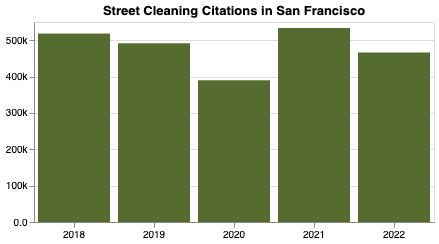

In [33]:
# Visualize the table
alt.Chart(
    st_cleaning_year_count,
    width=400,
    height=200
).mark_bar(color='darkolivegreen').encode(
    x=alt.X('Issued Year:O', axis=alt.Axis(labelAngle=0), title=''),
    y=alt.Y('Citation Number', axis=alt.Axis(format='.2s'), title='')
).properties(
    title='Street Cleaning Citations in San Francisco'
)

#### Take closer look at citation count each month

In [34]:
# Citation count by month (the date marks for each month)
st_cleaning_month_count = st_cleaning_5yr.groupby(
    pd.Grouper(key='Citation Issued DateTime', 
               axis=0, 
               freq='MS', 
               origin='start')).count()[['Citation Number']].reset_index() ## still datetime
# st_cleaning_month_count['Issued Month'] = st_cleaning_month_count['Citation Issued DateTime'].dt.strftime('%b, %Y')
## this change dtype to 'object'
st_cleaning_month_count

,Citation Issued DateTime,Citation Number
0,2018-01-01,41850
1,2018-02-01,41716
2,2018-03-01,45534
3,2018-04-01,41777
4,2018-05-01,45374
5,2018-06-01,43776
6,2018-07-01,41732
7,2018-08-01,47518
8,2018-09-01,41123
9,2018-10-01,41943


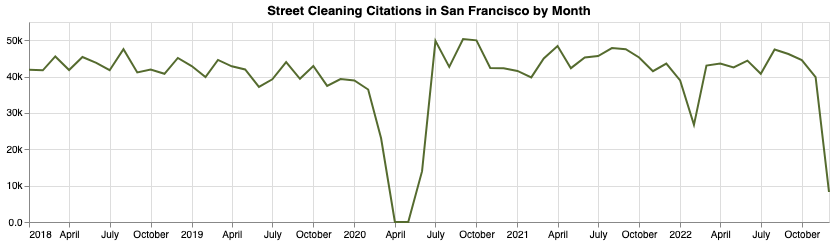

In [35]:
# Visualize the table (line chart has better view for this chart)
alt.Chart(
    st_cleaning_month_count,
    width=800,
    height=200
).mark_line(color='darkolivegreen').encode(
    x=alt.X('Citation Issued DateTime', axis=alt.Axis(labelAngle=0), title=''),
    y=alt.Y('Citation Number', axis=alt.Axis(format='.2s') , title='')
).properties(
    title='Street Cleaning Citations in San Francisco by Month'
)

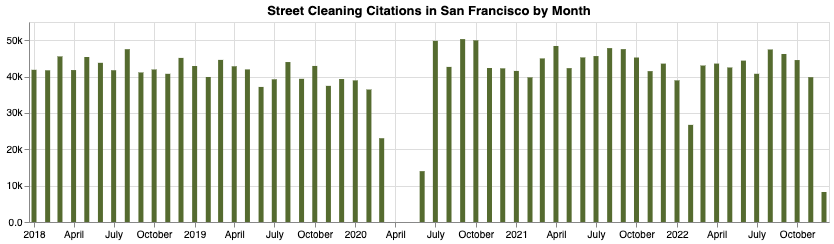

In [36]:
# Bar chart
alt.Chart(
    st_cleaning_month_count,
    width=800,
    height=200
).mark_bar(color='darkolivegreen').encode(
    x=alt.X('Citation Issued DateTime', axis=alt.Axis(labelAngle=0), title=''),
    y=alt.Y('Citation Number', axis=alt.Axis(format='.2s') , title='')
).properties(
    title='Street Cleaning Citations in San Francisco by Month'
)

*Note1: Citations were given pretty much similar each month, except April and May, 2020 (the start of lockdown during pandemic) unitl June 14, 2020*  
*Note2: Last data recorded was December 8th, 2022.*  
*Reference: [Mayor London Breed announced no ticket for street sweeping](https://twitter.com/LondonBreed/status/1240035183580966912) and [As the city gradually reopens, mechanical street sweeping enforcement is set to resume](https://www.sfmta.com/blog/city-gradually-reopens-mechanical-street-sweeping-enforcement-set-resume)*

#### What about total fine each year for street cleaning violations?

According to SFMTA, street cleaning fine varies from years:  
2022.07.01 `$87.0`  
2021.07.01 `$85.0`  
2021.01.01 `$83.0`  
2019.07.01 `$79.0`  
2018.07.01 `$76.0`  
2018.01.01 `$73.0`  
But there are more values rather than the ones above. According to SFMTA, late fee might apply.  
*Note: $0.0 have been deleted.*

**Explore 'Fine Amount'**  
There are some unexplianed amount of fine listed. Some amounts are yet to be solved.

In [37]:
# See different values in 'Fine Amount' column
st_cleaning_5yr['Fine Amount'].value_counts()

79.0     631603
76.0     507683
85.0     277788
83.0     265576
73.0     260215
84.0     230913
87.0     225323
25.0          2
110.0         2
189.0         2
272.0         1
71.0          1
Name: Fine Amount, dtype: int64

In [38]:
# See each 'unusual' amount of fee
st_cleaning_5yr[st_cleaning_5yr['Fine Amount'] == 71.0]

,Citation Number,Citation Issued DateTime,Violation,Violation Description,Citation Location,Vehicle Plate State,Vehicle Plate,Fine Amount,Date Added,geom,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,Issued Year
2165771,1004022526,2018-04-17 07:19:00,TRC7.2.22,STR CLEAN,900 BAYSHORE,CA,7SRJ296,71.0,05/11/2017 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,2018


In [39]:
st_cleaning_5yr[st_cleaning_5yr['Fine Amount'] == 272.0]

,Citation Number,Citation Issued DateTime,Violation,Violation Description,Citation Location,Vehicle Plate State,Vehicle Plate,Fine Amount,Date Added,geom,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,Issued Year
1785919,PD34895350,2019-07-16 07:31:00,TRC7.2.22,STR CLEAN,400 WINSTON,CA,5UNS141,272.0,08/08/2019 12:00:00 AM,POINT (-122.47672802899996 37.72913298900005),41.0,41.0,10.0,8.0,16.0,2019


In [40]:
st_cleaning_5yr[st_cleaning_5yr['Fine Amount'] == 189.0]

,Citation Number,Citation Issued DateTime,Violation,Violation Description,Citation Location,Vehicle Plate State,Vehicle Plate,Fine Amount,Date Added,geom,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,Issued Year
1297872,1005904281,2020-01-14 07:18:00,TRC7.2.22,STR CLEAN,1501 BAYSHOIRE,CA,6THW860,189.0,03/27/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,2020
1626118,1005979365,2020-01-27 15:04:00,TRC7.2.22,STR CLEAN,669 MISSION,CA,5AVE147,189.0,04/20/2021 12:00:00 AM,POINT (-122.40131583199997 37.78670342300006),32.0,32.0,1.0,10.0,8.0,2020


In [41]:
st_cleaning_5yr[st_cleaning_5yr['Fine Amount'] == 110.0]

,Citation Number,Citation Issued DateTime,Violation,Violation Description,Citation Location,Vehicle Plate State,Vehicle Plate,Fine Amount,Date Added,geom,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,Issued Year
453658,939940293,2021-06-24 08:35:00,TRC7.2.22,STR CLEAN,494 BARTLETT ST,CA,7RRJ853,110.0,07/18/2021 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,2021
1001045,936228090,2021-02-09 02:14:00,TRC7.2.22,STR CLEAN,1792 ARMSTRONG AVE,CA,MNN053,110.0,08/29/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,2021


In [42]:
st_cleaning_5yr[st_cleaning_5yr['Fine Amount'] == 25.0]

,Citation Number,Citation Issued DateTime,Violation,Violation Description,Citation Location,Vehicle Plate State,Vehicle Plate,Fine Amount,Date Added,geom,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,Issued Year
346362,943076525,2021-09-07 09:48:00,TRC7.2.22,STR CLEAN,1117 FULTON STREET,MA,1SEA19,25.0,09/13/2021 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,2021
362229,943076514,2021-09-07 09:47:00,TRC7.2.22,STR CLEAN,1117 FULTON STREET,CA,8VFF223,25.0,09/14/2021 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,2021


##### Total Fine Amount Each Year
From 2018 to 12/08/2022, street cleaning citations made up a total of `$192131812.0` fines.

In [43]:
# Group data by year then sum up the amount of fine
st_cleaning_year_fine = st_cleaning_5yr.groupby(
    pd.Grouper(key='Citation Issued DateTime', 
               axis=0, 
               freq='A', 
               origin='start')).sum()[['Fine Amount']].reset_index()

In [44]:
st_cleaning_year_fine

,Citation Issued DateTime,Fine Amount
0,2018-12-31,38603766.0
1,2019-12-31,38082488.0
2,2020-12-31,30786836.0
3,2021-12-31,44817260.0
4,2022-12-31,39841462.0


In [45]:
st_cleaning_5yr['Fine Amount'].sum()

192131812.0

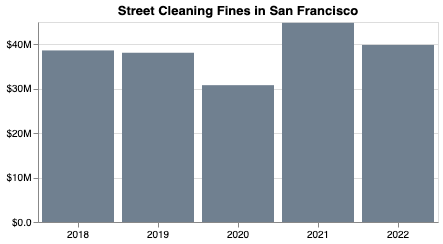

In [46]:
# Visualization, colorname: https://altair-viz.github.io/user_guide/generated/core/altair.ColorName.html
st_cleaning_year_fine['Year'] = pd.DatetimeIndex(st_cleaning_year_fine['Citation Issued DateTime']).year

alt.Chart(
    st_cleaning_year_fine,
    width=400,
    height=200
).mark_bar(color='slategray').encode(
    x=alt.X('Year:O', axis=alt.Axis(labelAngle=0, ), title=''),
    y=alt.Y('Fine Amount', axis=alt.Axis(format='$.2s'), title='')
).properties(
    title='Street Cleaning Fines in San Francisco'
)

#### What about total fine each month?

In [47]:
# Group data by month then sum up the amount of fine
st_cleaning_month_fine = st_cleaning_5yr.groupby(
    pd.Grouper(key='Citation Issued DateTime', 
               axis=0, 
               freq='MS', 
               origin='start')).sum()[['Fine Amount']].reset_index()

In [48]:
st_cleaning_month_fine

,Citation Issued DateTime,Fine Amount
0,2018-01-01,3055050.0
1,2018-02-01,3045268.0
2,2018-03-01,3323982.0
3,2018-04-01,3049719.0
4,2018-05-01,3312302.0
5,2018-06-01,3195648.0
6,2018-07-01,3171065.0
7,2018-08-01,3611368.0
8,2018-09-01,3125348.0
9,2018-10-01,3187668.0


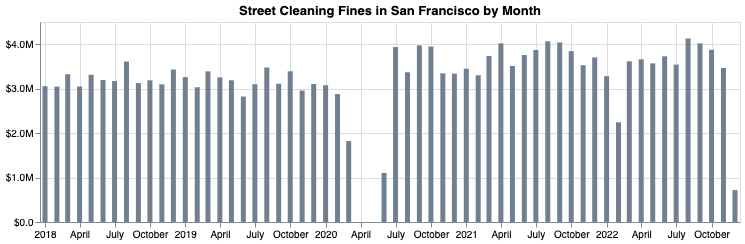

In [49]:
# Visualize
alt.Chart(
    st_cleaning_month_fine,
    width=700,
    height=200
).mark_bar(color='slategray').encode(
    x=alt.X('Citation Issued DateTime', axis=alt.Axis(labelAngle=0), title=''),
    y=alt.Y('Fine Amount', axis=alt.Axis(format='$.2s'), title='')
).properties(
    title='Street Cleaning Fines in San Francisco by Month'
)

### Before Mapping Out the Data
According to SFMTA, the neighborhood data (columns [11:15]) are added when the data migrates to SFDATA. Aggregation of assigning citation locations are possible in future analysis.  
More anaylsis, please refer to 03_st-cleaning-map.ipynb notebook.

#### Explore neighborhood data

In [51]:
st_cleaning_5yr['Analysis Neighborhoods'].isna().sum()

1470608

In [52]:
st_cleaning_5yr[st_cleaning_5yr['Analysis Neighborhoods'].isna()].sort_values(['Citation Issued DateTime']).head()

,Citation Number,Citation Issued DateTime,Violation,Violation Description,Citation Location,Vehicle Plate State,Vehicle Plate,Fine Amount,Date Added,geom,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,Issued Year
1788362,892536632,2018-01-02 00:08:00,TRC7.2.22,STR CLEAN,333 08TH ST,CA,7XSH956,73.0,09/24/2018 12:00:00 AM,POINT (-122.03654390799994 38.24835797800006),NaN,NaN,NaN,NaN,NaN,2018
1724365,892597812,2018-01-02 00:11:00,TRC7.2.22,STR CLEAN,755 FOLSOM ST,CA,7EJP872,73.0,02/03/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,2018
1738330,892597856,2018-01-02 00:22:00,TRC7.2.22,STR CLEAN,233 02ND ST,CA,5DAK513,73.0,01/31/2018 12:00:00 AM,POINT (-122.33781334999998 37.575313133000066),NaN,NaN,NaN,NaN,NaN,2018
1784722,892597882,2018-01-02 00:23:00,TRC7.2.22,STR CLEAN,231 02ND ST,WA,BFS7884,73.0,03/18/2018 12:00:00 AM,POINT (-122.33784344199995 37.57529217600006),NaN,NaN,NaN,NaN,NaN,2018
2317509,892597926,2018-01-02 00:31:00,TRC7.2.22,STR CLEAN,329 02ND ST,CA,7ZMS084,73.0,12/12/2022 12:00:00 AM,POINT (-122.03651451399998 38.24837362300008),NaN,NaN,NaN,NaN,NaN,2018


#### Hotspots for street cleaning citations?
Interestingly, there are 5 locations on the Mission St., 3 on Taylor St., and 2 on Jones St.  
If we put the locations on the map, 5 of the locations are in the Tenderloin district, 4 in SOMA district, and 1 in Financial district, but all locations are close to each other.

In [53]:
# Top 10 hotspots
st_cleaning_5yr['Citation Location'].value_counts().nlargest(10)

1190 MISSION ST    466
111 TAYLOR ST      344
540 JONES ST       333
1188 MISSION ST    290
814 MISSION ST     282
555 MISSION ST     271
556 JONES ST       266
520 TAYLOR ST      254
1018 MISSION ST    251
501 TAYLOR ST      242
Name: Citation Location, dtype: int64

#### Quick Maps
[Google Mymap](https://www.google.com/maps/d/edit?mid=1hqpDiDN_2dWwhyBaKwjsPb2qxoinSww&usp=sharing)

In [54]:
# Reference: drop rows or columns: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
# syntax: DataFrame.drop(labels=None, *, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')

### Reference
1. [New report shows these are worst places to park in San Francisco](https://abc7news.com/san-francisco-parking-violations-most-tickets-worst-places/12158961/)
2. [Don’t Want a Ticket? These Are the Worst Places in SF to Park](https://sfstandard.com/research-data/worst-places-park-san-francisco-parking-ticket/)
3. [‘SFMTA will not ticket for street sweeping,’ says mayor](https://sf.curbed.com/2020/3/17/21183307/sf-shelter-place-parking-street-sweeping-coronavirus)
4. [A study on San Francisco Parking Tickets](https://www.spotangels.com/blog/sf-parking-tickets-most-ticketed-areas-in-sf/)
5. [Here are the answers to your San Francisco street sweeping questions](https://www.sfgate.com/local-donotuse/article/Here-are-answers-to-your-SF-street-sweeping-SFMTA-14056031.php)
6. [As the city gradually reopens, mechanical street sweeping enforcement is set to resume](https://www.sfmta.com/blog/city-gradually-reopens-mechanical-street-sweeping-enforcement-set-resume)
7. Latest: [One man followed S.F.’s street sweeping rules. Why did he still get a ticket?](https://www.sfchronicle.com/sf/article/sf-street-sweeping-rules-17619461.php)